# Chapter 9 Support Vector Machine 

## 9.1 The Optimum Border

## 9.2 Theory of Optimization

## 9.3 Support Vector Machine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn # Gaussian Random Number

In [4]:
conda install -c conda-forge cvxopt

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\prof-\anaconda3

  added / updated specs:
    - cvxopt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cvxopt-1.2.0               |   py38h8a9fdb6_0         848 KB
    glpk-4.65                  |    h8ffe710_1004         3.5 MB  conda-forge
    gsl-2.4                    |    hfa6e2cd_1004         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  cvxopt             pkgs/main/win-64::cvxopt-1.2.0-py38h8a9fdb6_0
  glpk               conda-forge/win-64::glpk-4.65-h8ffe710_1004
  gsl                conda-forge/win-64::gsl-2.4-hfa6e2cd_1004




cvxopt-1.2.0         | 848 KB    |            |   0% 
cvxopt-1.2.0         | 848 KB    | 1          |   2% 

In [5]:
import cvxopt
from cvxopt import matrix

In [7]:
a=randn(1);b=randn(1)
n=100
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]+0.1*randn(n))
y=y.reshape(-1,1)  # The shape should be made clear.

In [8]:
def svm_1(X,y,C):
    eps=0.0001
    n=X.shape[0]
    P=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            P[i,j]=np.dot(X[i,:],X[j,:])*y[i]*y[j]
    # Specify them using the matrix function in the package
    P=matrix(P+np.eye(n)*eps)                
    A=matrix(-y.T.astype(np.float))
    b=matrix(np.array([0]).astype(np.float))
    h=matrix(np.array([C]*n+[0]*n).reshape(-1,1).astype(np.float))
    G=matrix(np.concatenate([np.diag(np.ones(n)),np.diag(-np.ones(n))]))       
    q=matrix(np.array([-1]*n).astype(np.float))
    res=cvxopt.solvers.qp(P,q,A=A, b=b,G=G, h=h)    # Execute the solver.
    alpha=np.array(res['x'])  # x is the alpha in the text
    beta=((alpha*y).T@X).reshape(2,1)
    index = (eps < alpha[:, 0]) & (alpha[:, 0] < C - eps)
    beta_0=np.mean(y[index]-X[index,:]@beta)
    return {'beta':beta, 'beta_0':beta_0}

In [9]:
n=10
matrix(np.concatenate([np.diag(np.ones(2)),np.diag(-np.ones(2))]))

<4x2 matrix, tc='d'>

     pcost       dcost       gap    pres   dres
 0: -2.1357e+02 -1.2813e+04  4e+04  1e+00  1e-14
 1: -6.1131e+01 -6.3027e+03  9e+03  2e-01  1e-14
 2:  2.6757e+01 -8.4467e+02  1e+03  1e-02  2e-14
 3: -9.4194e+01 -3.0111e+02  2e+02  2e-03  7e-15
 4: -1.3698e+02 -2.3620e+02  1e+02  9e-04  6e-15
 5: -1.5679e+02 -2.1537e+02  6e+01  5e-04  6e-15
 6: -1.6894e+02 -1.9704e+02  3e+01  2e-04  7e-15
 7: -1.7720e+02 -1.8862e+02  1e+01  4e-05  8e-15
 8: -1.7934e+02 -1.8475e+02  5e+00  3e-15  8e-15
 9: -1.8166e+02 -1.8234e+02  7e-01  2e-15  8e-15
10: -1.8188e+02 -1.8211e+02  2e-01  5e-15  8e-15
11: -1.8197e+02 -1.8202e+02  5e-02  6e-15  1e-14
12: -1.8199e+02 -1.8199e+02  6e-04  2e-15  8e-15
13: -1.8199e+02 -1.8199e+02  6e-06  9e-16  1e-14
Optimal solution found.


{'beta': array([[5.20286052],
        [3.1785283 ]]),
 'beta_0': 0.17268089301813397}

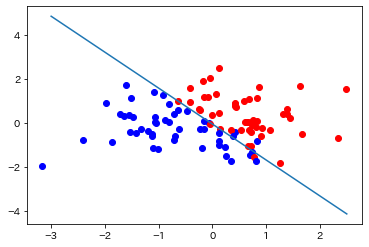

In [10]:
a=randn(1);b=randn(1)
n=100
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]+0.1*randn(n))
y=y.reshape(-1,1)  # The shape should be made clear.
for i in range(n):
    if y[i]==1:
        plt.scatter(X[i,0],X[i,1],c="red")
    else :
        plt.scatter(X[i,0],X[i,1],c="blue")
res=svm_1(X,y,C=10)
def f(x):
    return -res['beta_0']/res['beta'][1]-x*res['beta'][0]/res['beta'][1]
x_seq=np.arange(-3,3,0.5)
plt.plot(x_seq,f(x_seq))
res

## 9.4 Extension of SVM using kernels

In [11]:
def K_linear(x,y):
    return x.T@y
def K_poly(x,y):
    return (1+x.T@y)**2

In [12]:
def svm_2(X,y,C,K):
    eps=0.0001
    n=X.shape[0]
    P=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            P[i,j]=K(X[i,:],X[j,:])*y[i]*y[j]
    # Use the matrix function in the package.
    P=matrix(P+np.eye(n)*eps)                
    A=matrix(-y.T.astype(np.float))
    b=matrix(np.array([0]).astype(np.float))
    h=matrix(np.array([C]*n+[0]*n).reshape(-1,1).astype(np.float))
    G=matrix(np.concatenate([np.diag(np.ones(n)),np.diag(-np.ones(n))]))       
    q=matrix(np.array([-1]*n).astype(np.float))
    res=cvxopt.solvers.qp(P,q, A=A, b=b,G=G, h=h)
    alpha=np.array(res['x'])  # x is the alpha in the text.
    beta=((alpha*y).T@X).reshape(2,1)
    index = (eps < alpha[:, 0]) & (alpha[:, 0] < C - eps)
    beta_0=np.mean(y[index]-X[index,:]@beta)
    return {'alpha':alpha, 'beta':beta, 'beta_0':beta_0}

In [13]:
# Execution
a=3;b=-1
n=200
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]**2+0.3*randn(n))
y=y.reshape(-1,1)

In [14]:
def plot_kernel(K,line): # The parameter line specifies the line variation. 
    res=svm_2(X,y,1,K)
    alpha=res['alpha'][:,0]
    beta_0=res['beta_0']
    def f(u,v):
        S=beta_0
        for i in range(X.shape[0]):
            S=S+alpha[i]*y[i]*K(X[i,:],[u,v])
        return S[0]
    uu=np.arange(-2,2,0.1); vv=np.arange(-2,2,0.1); ww=[]
    for v in vv:
        w=[]
        for u in uu:
            w.append(f(u,v))
        ww.append(w)
    plt.contour(uu,vv,ww,levels=0,linestyles=line)

     pcost       dcost       gap    pres   dres
 0: -8.1643e+01 -5.9187e+02  4e+03  4e+00  1e-14
 1: -4.9890e+01 -4.1442e+02  8e+02  6e-01  1e-14
 2: -2.8759e+01 -1.5214e+02  2e+02  1e-01  8e-15
 3: -2.1058e+01 -4.2639e+01  3e+01  2e-02  6e-15
 4: -2.4097e+01 -3.1362e+01  9e+00  4e-03  4e-15
 5: -2.4819e+01 -2.9954e+01  6e+00  2e-03  3e-15
 6: -2.5825e+01 -2.7897e+01  2e+00  5e-04  4e-15
 7: -2.6452e+01 -2.6974e+01  5e-01  3e-05  4e-15
 8: -2.6670e+01 -2.6686e+01  2e-02  1e-06  4e-15
 9: -2.6677e+01 -2.6678e+01  4e-04  2e-08  4e-15
10: -2.6677e+01 -2.6677e+01  4e-06  2e-10  3e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.9104e+01 -5.7550e+02  3e+03  3e+00  3e-15
 1: -5.5627e+01 -3.9967e+02  7e+02  5e-01  2e-15
 2: -3.9915e+01 -1.3404e+02  1e+02  6e-02  8e-15
 3: -4.5581e+01 -6.6614e+01  2e+01  1e-02  3e-15
 4: -4.9691e+01 -5.8699e+01  1e+01  4e-03  2e-15
 5: -5.1799e+01 -5.4875e+01  3e+00  9e-04  2e-15
 6: -5.2627e+01 -5.3543e+01  1e+00  2e-04  1e-1

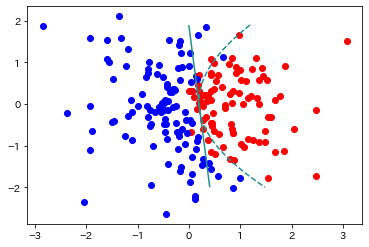

In [15]:
for i in range(n):
    if y[i]==1:
        plt.scatter(X[i,0],X[i,1],c="red")
    else:
        plt.scatter(X[i,0],X[i,1],c="blue")
plot_kernel(K_poly,line="dashed")
plot_kernel(K_linear,line="solid")

In [17]:
import sklearn
from sklearn import svm

In [18]:
x=randn(200,2)
x[0:100,]=x[0:100,]+2
x[100:150,]=x[100:150,]-2
y=np.concatenate(([1 for i in range(150)],[2 for i in range(50)]))

In [19]:
train=np.random.choice(200, 100, replace=False)
test=list(set(range(200))-set(train))
res_svm = svm.SVC(kernel="rbf",gamma=1,C=100)  # SVM without tuning

In [20]:
res_svm.fit(x[train,],y[train])  # execution

SVC(C=100, gamma=1)

In [21]:
res_svm.predict(x[test,])      # The prediction for the test data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1])

In [23]:
conda install -c conda-forge mlxtend

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\prof-\anaconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mlxtend-0.18.0             |     pyhd3deb0d_0         1.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  mlxtend            conda-forge/noarch::mlxtend-0.18.0-pyhd3deb0d_0




mlxtend-0.18.0       | 1.2 MB    |            |   0% 
mlxtend-0.18.0       | 1.2 MB    | 1          |   1% 
mlxtend-0.18.0       | 1.2 MB    | #####5     |  55% 
mlxtend-0.18.0       | 1.2 MB    | ########## | 100% 
mlxtend-0.18.0       | 1.2 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction

In [24]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

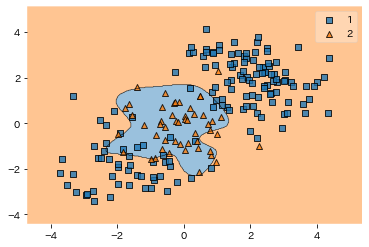

In [25]:
plot_decision_regions(x,y,clf=res_svm)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid = {'C': [0.1, 1,10, 100, 1000],  'gamma' : [0.5, 1, 2, 3, 4]}

In [28]:
tune = GridSearchCV(svm.SVC(), grid, cv=10)
tune.fit(x[train,],y[train])

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.5, 1, 2, 3, 4]})

In [29]:
tune.best_params_   #C=1, gamma=0.5 seems to be the optimum

{'C': 10, 'gamma': 0.5}

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x=iris.data
y=iris.target
train=np.random.choice(150, 120, replace=False)
test=np.ones(150,dtype=bool)
test[train]=False

In [31]:
iris_svm = svm.SVC(kernel="rbf",gamma=1,C=10)
iris_svm.fit(x[train,],y[train])

SVC(C=10, gamma=1)

In [32]:
# table_count defined in Chapter 3
def table_count(m,u,v):
    n=u.shape[0]
    count=np.zeros([m,m])
    for i in range(n):
        count[int(u[i]),int(v[i])]+=1
    return(count)

In [33]:
y_pre=iris_svm.predict(x[test,])
table_count(3,y[test],y_pre)

array([[10.,  0.,  0.],
       [ 0.,  8.,  1.],
       [ 0.,  2.,  9.]])